# Weather Py

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

from api_keys import weather_api_key
from api_keys import g_key


from citipy import citipy

output_data_file= "../output_data/cities.csv"
lat_range = (-90,90)
lng_range = (-180,180)

# Generate Cities List

In [2]:
lat_lngs = []
cities = []

lat = np.random.uniform(low= -90.000, high = 90.000, size=1500)
lng = np.random.uniform(low= -90.000, high = 90.000, size=1500)
lat_lngs= zip(lat, lng)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

print(len(cities))

619


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

weather_data_df = pd.read_csv(output_data_file, delimiter = ',') 
weather_data_df.head(20)

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05
5,5,atuona,78,PF,1558378755,76,-9.80,-139.03,81.96,16.49
6,6,flinders,0,AU,1558378755,62,-34.58,150.85,60.01,11.41
7,7,opuwo,0,NaN,1558378523,23,-18.06,13.84,72.06,5.44
8,8,tiksi,95,RU,1558378756,88,71.64,128.87,14.10,15.70
9,9,pushkinskiye gory,6,RU,1558378756,70,57.02,28.91,65.04,6.93


# Perform API Calls

In [4]:
                     
url = "http://api.openweathermap.org/data/2.5/weather?"

record = 0
sets = 1


weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""

print("Beginning Data Retrieval")

for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
           
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"  city not found ..skipping {city}.")
       
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("Data Retrieval Complete")


Beginning Data Retrieval
Processing Record 0  of Set 1 | tasiilaq.
Processing Record 1  of Set 1 | sao joao da barra.
Processing Record 2  of Set 1 | hambantota.
Processing Record 3  of Set 1 | upernavik.
Processing Record 4  of Set 1 | ushuaia.
Processing Record 5  of Set 1 | roald.
Processing Record 6  of Set 1 | khorramshahr.
Processing Record 7  of Set 1 | opuwo.
Processing Record 8  of Set 1 | hermanus.
Processing Record 9  of Set 1 | bangui.
Processing Record 10  of Set 1 | uyo.
Processing Record 11  of Set 1 | lebu.
Processing Record 12  of Set 1 | bojnurd.
Processing Record 13  of Set 1 | chapais.
Processing Record 14  of Set 1 | jamestown.
Processing Record 15  of Set 1 | busselton.
Processing Record 16  of Set 1 | vardo.
Processing Record 17  of Set 1 | arraial do cabo.
Processing Record 18  of Set 1 | lobito.
Processing Record 19  of Set 1 | hithadhoo.
Processing Record 20  of Set 1 | bambous virieux.
Processing Record 21  of Set 1 | eyl.
Processing Record 22  of Set 1 | tao

Processing Record 22  of Set 4 | tucurui.
Processing Record 23  of Set 4 | massena.
Processing Record 24  of Set 4 | zilair.
Processing Record 25  of Set 4 | quetta.
Processing Record 26  of Set 4 | gwadar.
Processing Record 27  of Set 4 | troitsko-pechorsk.
Processing Record 28  of Set 4 | tapaua.
  city not found ..skipping tapaua.
Processing Record 29  of Set 4 | severodvinsk.
Processing Record 30  of Set 4 | nuuk.
Processing Record 31  of Set 4 | hata.
Processing Record 32  of Set 4 | bellegarde-sur-valserine.
Processing Record 33  of Set 4 | eskasem.
  city not found ..skipping eskasem.
Processing Record 34  of Set 4 | savannah bight.
Processing Record 35  of Set 4 | alghero.
Processing Record 36  of Set 4 | sao filipe.
Processing Record 37  of Set 4 | imbituba.
Processing Record 38  of Set 4 | juba.
Processing Record 39  of Set 4 | de panne.
Processing Record 40  of Set 4 | mocuba.
Processing Record 41  of Set 4 | tandil.
Processing Record 42  of Set 4 | luderitz.
Processing Reco

Processing Record 48  of Set 7 | muisne.
Processing Record 49  of Set 7 | vila velha.
Processing Record 0  of Set 8 | louisbourg.
  city not found ..skipping louisbourg.
Processing Record 1  of Set 8 | nedjo.
Processing Record 2  of Set 8 | lerwick.
Processing Record 3  of Set 8 | rawson.
Processing Record 4  of Set 8 | manoel urbano.
Processing Record 5  of Set 8 | samrala.
Processing Record 6  of Set 8 | sabang.
Processing Record 7  of Set 8 | inhambane.
Processing Record 8  of Set 8 | santo antonio do ica.
Processing Record 9  of Set 8 | beira.
Processing Record 10  of Set 8 | agsu.
  city not found ..skipping agsu.
Processing Record 11  of Set 8 | igarka.
Processing Record 12  of Set 8 | ayna.
Processing Record 13  of Set 8 | isabela.
Processing Record 14  of Set 8 | ugoofaaru.
Processing Record 15  of Set 8 | malakal.
Processing Record 16  of Set 8 | faya.
Processing Record 17  of Set 8 | alexandria.
Processing Record 18  of Set 8 | trelew.
Processing Record 19  of Set 8 | waterto

Processing Record 29  of Set 11 | port blair.
Processing Record 30  of Set 11 | sopelana.
Processing Record 31  of Set 11 | urucara.
Processing Record 32  of Set 11 | paracuru.
Processing Record 33  of Set 11 | vangaindrano.
Processing Record 34  of Set 11 | vila franca do campo.
Processing Record 35  of Set 11 | garowe.
Processing Record 36  of Set 11 | nova olinda do norte.
Processing Record 37  of Set 11 | atasu.
Processing Record 38  of Set 11 | zhezkazgan.
Processing Record 39  of Set 11 | terrasini.
Processing Record 40  of Set 11 | nador.
Processing Record 41  of Set 11 | arauco.
Processing Record 42  of Set 11 | astana.
Processing Record 43  of Set 11 | marica.
Processing Record 44  of Set 11 | rockland.
Processing Record 45  of Set 11 | necochea.
Processing Record 46  of Set 11 | mpongwe.
Processing Record 47  of Set 11 | kuche.
  city not found ..skipping kuche.
Processing Record 48  of Set 11 | jumla.
Processing Record 49  of Set 11 | yalutorovsk.
Processing Record 0  of Set

# Convert Raw Data to DataFrame

In [7]:
weather_df.count()

City                619
Country             619
Date                619
Latitude            619
Longitude           619
Cloudiness (%)      619
Humidity (%)        619
Max Temp (F)        619
Wind Speed (mph)    619
dtype: int64

In [8]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,tasiilaq,GL,2022-04-23 07:20:53,65.6145,-37.6368,100,95,45.032,1.01
1,sao joao da barra,BR,2022-04-23 07:20:54,-21.6403,-41.0511,52,63,82.76,3.56
2,hambantota,LK,2022-04-23 07:20:54,6.1241,81.1185,90,76,84.164,4.68
3,upernavik,GL,2022-04-23 07:20:54,72.7868,-56.1549,100,96,6.584,4.02
4,ushuaia,AR,2022-04-23 07:20:55,-54.8,-68.3,40,75,42.728,3.09


In [9]:
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)

weather_df
                         
weather_df.to_csv('weather_df.csv')

# Latitude & Temperature plot

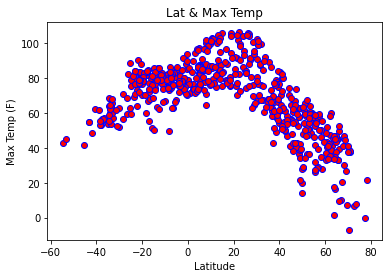

In [36]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df['Latitude']).astype(float),pd.to_numeric(weather_df['Max Temp (F)']).astype(float), marker = 'o', facecolors = 'red',edgecolor = 'blue')

plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.title('Lat & Max Temp')

plt.savefig("Lattitude & Max Temp.jpg")
plt.show()


# Latitue & Humidity plot

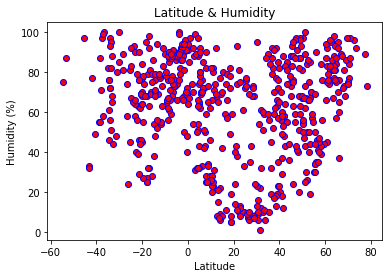

In [37]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df['Latitude']).astype(float),pd.to_numeric(weather_df['Humidity (%)']).astype(float), marker = 'o', facecolors = 'red',edgecolor = 'blue')

plt.xlabel('Latitude')   
plt.ylabel('Humidity (%)')   
plt.title('Latitude & Humidity')  

plt.savefig("Latitue & Humidity.jpg")
plt.show()




# Latitude & Cloudiness plot

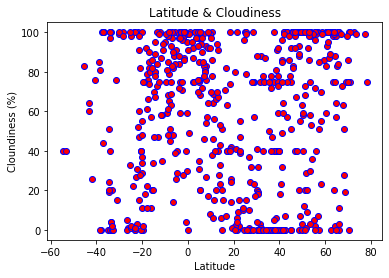

In [38]:

today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df['Latitude']).astype(float), pd.to_numeric(weather_df['Cloudiness (%)']).astype(float), marker = 'o', facecolors = 'red',edgecolor = 'blue')

plt.xlabel('Latitude')
plt.ylabel('Cloundiness (%)')
plt.title('Latitude & Cloudiness')

plt.savefig("Latitude & Cloudiness.jpg")
plt.show()


# Latitude & Wind speed plot

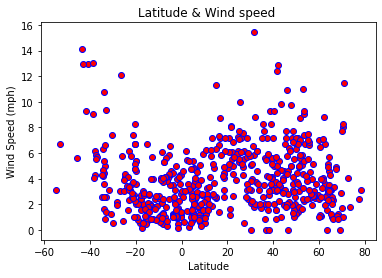

In [39]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df['Latitude']).astype(float), pd.to_numeric(weather_df['Wind Speed (mph)']).astype(float), marker = 'o', facecolors = 'red',edgecolor = 'blue')     

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude & Wind speed ')

plt.savefig("Latitude & Wind speed.jpg")
plt.show()


# Linear Regression

In [14]:

north_df=weather_df.loc[pd.to_numeric(weather_df['Latitude']).astype(float)> 0, :]
south_df=weather_df.loc[pd.to_numeric(weather_df['Latitude']).astype(float)< 0, :]


### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line: y = -0.93x + 99.24
The r-squared is: -0.8136783769030981


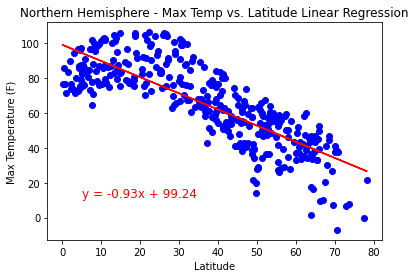

In [26]:
x_values = pd.to_numeric(north_df['Latitude']).astype(float)
y_values = pd.to_numeric(north_df['Max Temp (F)']).astype(float)

(slope, intercept, rvalue, p, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values, color = "blue")
plt.annotate(line_eq,(5,12),fontsize=12,color="red")
plt.plot(x_values,regress_values,"r-")

plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"Regression line: {line_eq}")
print(f"The r-squared is: {rvalue}")

plt.savefig('Northern Hemisphere - Max Temp vs. Latitude Linear Regression.jpg')
plt.show();

Conclusion: 
    Relationship between Max Temperature and Latitude in Northern Hemisphere is negative correlation.
    The temperature will decrease when we move far away the equator

### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line: y=0.57x+83.08
The r square value is : 0.6493778718619113


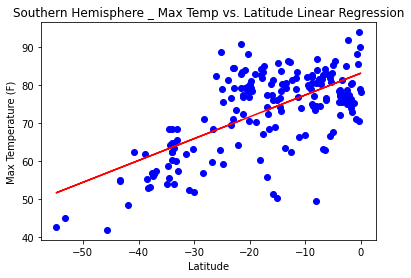

In [27]:
x_values=pd.to_numeric(south_df['Latitude']).astype(float)
y_values=pd.to_numeric(south_df['Max Temp (F)']).astype(float)

(slope, intercept, rvalue, p, stderr) = linregress(x_values, y_values)
regress_values= x_values*slope + intercept
line_eq = "y=" + str(round(slope, 2))+ "x+" +str(round(intercept,2))

plt.scatter(x_values, y_values, color = "blue")
plt.annotate(line_eq, (5,12),fontsize= 12,color = "red")
plt.plot(x_values, regress_values, "r-")

plt.title('Southern Hemisphere _ Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

print(f"Regression line: {line_eq}")
print(f"The r square value is : {rvalue}")

plt.savefig('Southern Hemisphere - Max Temp vs. Latitude Linear Regression.jpg')
plt.show();

Conclusion: 
    Relationship between Max Temperature and Latitude in Southern Hemisphere is positive correlation.
    The temperature will increase when we move closer to the equator position. 

### Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line: y = 0.34x + 45.73
The r-squared is: 0.2567385089411293


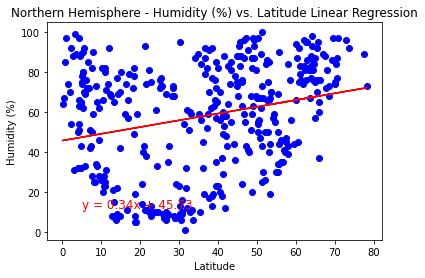

In [44]:
x_values = pd.to_numeric(north_df['Latitude']).astype(float)
y_values = pd.to_numeric(north_df['Humidity (%)']).astype(float)

(slope, intercept, rvalue, p, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_values,y_values, color = "blue")
plt.annotate(line_eq,(5,12),fontsize=12,color="red")
plt.plot(x_values,regress_values,"r-")


plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"Regression line: {line_eq}")
print(f"The r-squared is: {rvalue}")

plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.jpg')
plt.show();

Conclusion: 
    Relationship between Humidity and Latitude in Northern Hemisphere is positive correlation.
    The humidity will increase when we move far away the equator

### Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line: y = 0.26x + 76.18
The r-squared is: 0.17541339424094357


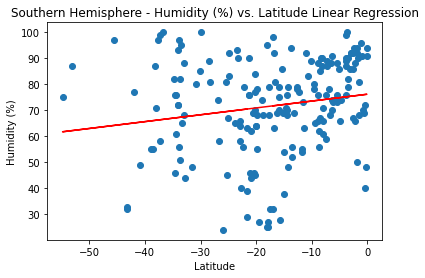

In [45]:
x_values = pd.to_numeric(south_df['Latitude']).astype(float)
y_values = pd.to_numeric(south_df['Humidity (%)']).astype(float)

(slope, intercept, rvalue, p, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.annotate(line_eq,(5,12),fontsize=12,color="red")
plt.plot(x_values,regress_values,"r-")


plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

print(f"Regression line: {line_eq}")
print(f"The r-squared is: {rvalue}")

plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.jpg')
plt.show();

Conclusion: 
    Relationship between humidity and Latitude in Southern Hemisphere is positive correlation.
    Humidity will increase when we closer to the equator 

### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line: y = 0.26x + 76.18
The r-squared is: 0.07659632263905156


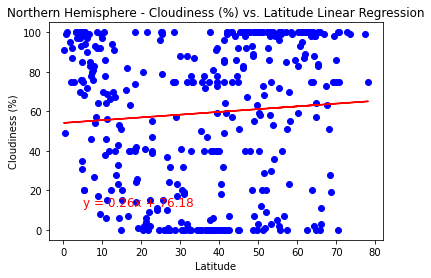

In [46]:
x_values = pd.to_numeric(north_df["Latitude"]).astype(float)
y_values = pd.to_numeric(north_df["Cloudiness (%)"]).astype(float)

(slope, intercept, rvalue, p, stderr ) = linregress(x_values, y_values)
regress_values= x_values*slope + intercept
lin_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values,  color = "blue")
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5,12), fontsize = 12, color = "red")

plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

print(f"Regression line: {line_eq}")
print(f"The r-squared is: {rvalue}")

plt.savefig('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.jpg')
plt.show();


Conclusion: 
   There is not much relationship between cloudiness and Latitude

### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line: y = -0.1 x +1.62
The r-squared is: -0.48073800501006936


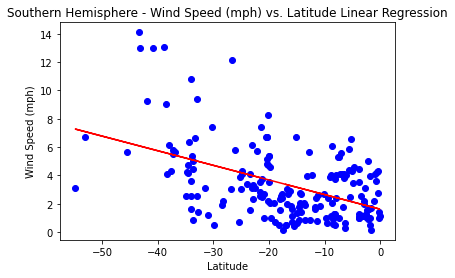

In [47]:
x_values = pd.to_numeric(south_df['Latitude']).astype(float)
y_values = pd.to_numeric(south_df['Wind Speed (mph)']).astype(float)

(slope, intercept, rvalue, p, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + " x +" + str(round(intercept,2))

plt.scatter(x_values, y_values,  color = "blue")
plt.annotate(line_eq,(5,12),fontsize=12,color="red")
plt.plot(x_values, regress_values, "r-")


plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

print(f"Regression line: {line_eq}")
print(f"The r-squared is: {rvalue}")

plt.savefig('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.jpg')
plt.show();


Conclusion: 
    Relationship between Wind speed and Latitude in Southern Hemisphere is negative correlation.
    Wind speed will decrease when we move closer to the equator 